# 2. Wrangle the Raster Data (3 layers)
# Part 2:  Elevation Data using SRTM

In [1]:
# Download stored variables from previous notebook

# Variables from study area download
# Project data directory
%store -r habitat_suitability_data_dir 
# Site gdfs
%store -r comanche_grassland_gdf pawnee_grassland_gdf 
# Study area gdf list
%store -r chosen_grasslands_bounds_gdfs

In [2]:
# Prepare for download Part 1 of 1
## Import packages that will help with...

# Reproducible file paths
import os # Reproducible file paths
import pathlib # Find the home folder
from glob import glob  # returns list of paths
import zipfile # Work with zip files

# Find files by pattern
import matplotlib.pyplot as plt # Overlay pandas and xarry plots,Overlay raster and vector data
import rioxarray as rxr # Work with geospatial raster data


# Work with tabular, vector, and raster data
import cartopy.crs as ccrs # CRSs (Coordinate Reference Systems)
import geopandas as gpd # work with vector data
import hvplot.pandas # Interactive tabular and vector data
import hvplot.xarray # Interactive raster
from math import floor, ceil # working with bounds, floor rounds down ciel rounds up
import pandas as pd # Group and aggregate
from rioxarray.merge import merge_arrays # Merge rasters
import xarray as xr # Adjust images
import xrspatial # calculate slope

# Access NASA data
import earthaccess # Access NASA data from the cloud

In [3]:
# Prep for downloading SRTM 

# Create data dir 
elevation_dir= os.path.join(habitat_suitability_data_dir, 'srtm')
os.makedirs(elevation_dir, exist_ok=True)

# call the variable to check location
elevation_dir

'/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm'

In [4]:
# Download Raster data through earthaccess Part 1 of 1
# Login and search earthaccess, download results

# login to earthaccess
earthaccess.login(strategy="interactive", persist=True)

# Iterate through the list of bounding GeoDataFrames (areas of interest)
for bounds_gdf in chosen_grasslands_bounds_gdfs:

    # Only download once - conditional
    #if not glob (os.path.join(elevation_dir, '*hgt.zip')):
    # *when I used this my code wouldn't work*
   
    # Set bounds
    bounds = tuple(bounds_gdf.total_bounds)

    # Search earthaccess
    elevation_results = earthaccess.search_data(
        short_name = "SRTMGL1",
        bounding_box = bounds
    )
    elevation_results

    # Download earthaccess results
    srtm_files = earthaccess.download(elevation_results, elevation_dir)

    # Return a list of file paths that match the pattern
    srtm_files = glob (os.path.join(
    elevation_dir, 
    '*hgt.zip')
    )

# Call srtm_file to see it 
srtm_files

QUEUEING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/6 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

['/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W104.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W104.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W103.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W103.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W104.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W104.SRTMGL1.hgt.zip']

In [5]:
# Create list of files for each study area
comanche_srtm_files = [
    srtm_files[0], 
    srtm_files[1], 
    srtm_files[2], 
    srtm_files[3], 
    srtm_files[4], 
    srtm_files[5]
    ]
pawnee_srtm_files = [
    srtm_files[6], 
    srtm_files[7], 
    srtm_files[8], 
    srtm_files[9]
    ]

# Create list of each sites files # Call list to make sure it's right
srtm_files_list = [comanche_srtm_files , pawnee_srtm_files]

# Call list to make sure it's right
srtm_files_list

[['/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W104.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W104.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W103.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W103.SRTMGL1.hgt.zip'],
 ['/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W104.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W104.SRTMGL1.hgt.zip']]

In [6]:
# Create function with description to process srtm raster images
# Part 1 of 1
def process_image_list(url_list, chosen_buffer, bounds_gdf):
    """
    Load, crop, and scale a raster image 

    Parameters
    ----------
    url: file-like or path-like
      File accessor downloaded or obtained 
    chosen_buffer: float number
      Amount of degrees to extend past the bounds of the bounds_gdf 
    bounds_gdf: gpd.GeoDataFrame
      Area of interest to crop to

    Returns
    -------
    merged_da: rxr.DataArray
      Processed raster
    """   
        
    # List to store cropped DataArrays for the current site 
    da_list= []
      
    buffer= chosen_buffer

    for url in url_list:

        # Connect to the raster image
        da = rxr.open_rasterio(
          url, 
          mask_and_scale=True
          ).squeeze()
        
          # Get the study bounds
        bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
          bounds_gdf
          .to_crs(da.rio.crs)
          .total_bounds 
          )

        # Crop the raster image to the bounds of the study area
        cropped_da = (
          da.rio.clip_box(bounds_min_lon-buffer, bounds_min_lat-buffer, bounds_max_lon+buffer, bounds_max_lat+buffer)
          )
        
        # Append the cropped DataArray to the list
        da_list.append(cropped_da)

    # Merge the cropped DataArrays for this site
    merged_da = (
      merge_arrays(da_list)
      )
        
    return merged_da


In [7]:
# Use process_image_list function on each set of site files 
# save to new variable names to use later

# Use process_image_list function on comanche srtm files
srtm_comanche_result_da = process_image_list(comanche_srtm_files, .025, comanche_grassland_gdf)

# Use process_image_list function on comanche srtm files
srtm_pawnee_result_da = process_image_list(pawnee_srtm_files, .025, pawnee_grassland_gdf)

# Create a list to save the site srtm results to
# Call this list to make sure it worked
srtm_da_results = [
    srtm_comanche_result_da,
    srtm_pawnee_result_da
]
srtm_da_results

[<xarray.DataArray (y: 3491, x: 6467)> Size: 90MB
 array([[1400., 1400., 1399., ..., 1146., 1146.,   nan],
        [1401., 1401., 1400., ..., 1147., 1146.,   nan],
        [1402., 1402., 1400., ..., 1148., 1148.,   nan],
        ...,
        [1893., 1894., 1893., ..., 1133., 1132.,   nan],
        [1892., 1894., 1895., ..., 1134., 1133.,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]], dtype=float32)
 Coordinates:
   * x            (x) float64 52kB -104.1 -104.1 -104.1 ... -102.3 -102.3 -102.3
   * y            (y) float64 28kB 37.94 37.94 37.94 37.94 ... 36.97 36.97 36.97
     band         int64 8B 1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Point
     units:          m
     _FillValue:     nan,
 <xarray.DataArray (y: 1594, x: 4566)> Size: 29MB
 array([[1899., 1899., 1899., ..., 1487., 1487., 1487.],
        [1899., 1900., 1901., ..., 1488., 1488., 1487.],
        [1901., 1901., 1902., ..., 1487., 1487., 1487.],
        ...,
        [1546., 1545.,

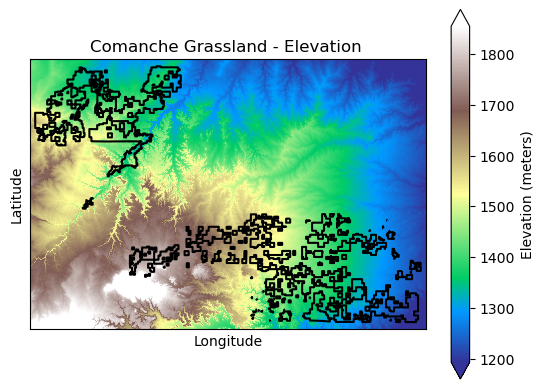

In [8]:
# Plot the processed raster on Comanche National Grassland
srtm_comanche_result_da.plot(
    cbar_kwargs={"label": "Elevation (meters)"},
    robust=True,
    cmap='terrain',
)
# Overlay the boundary of the same study area
comanche_grassland_gdf.boundary.plot(ax=plt.gca(),
    color='black').set(
        title='Comanche Grassland - Elevation ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()


## Comanche Grassland Elevation - plotted correctly, wide range in 
## elevation is seen, the lower half of this range is not within the 
## perferred range for Rocky Mountain Juniper

The elevation scale (1200-1800 meters), is roughly 4000 - 5900 feet in 
elevation. The rocky mountain juniper's perferred range is 5000 to 
7500 feet (1524 meters to 2285 meters), so only the upper half of the 
elevation color bar scale would be applicapable to the species chosen. 
The lower right unit, Carrizo, has most of the right half of it visually 
in the elevations that would not be acceptable, and the upper left unit, 
Timpas, is mostly in the lower half of the elevation scale. So, it will be 
interesting in further analysis if this is a limiting factor for 
habitat suitability.

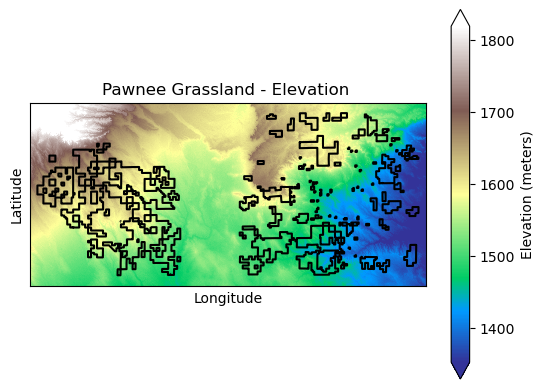

In [9]:
# Plot the processed raster on Pawnee National Grassland
srtm_pawnee_result_da.plot(
    cbar_kwargs={"label": "Elevation (meters)"},
    robust=True,
    cmap='terrain',
)
# Overlay the boundary of the same study area
pawnee_grassland_gdf.boundary.plot(ax=plt.gca(),
    color='black').set(
        title='Pawnee Grassland - Elevation ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()

## Pawnee Grassland Elevation - plotted correctly, smaller range in 
## elevation is seen comapred to Comanche, most of this 
## range is within the perferred range for Rocky Mountain Juniper

Almost all of the left unity would be in areas that are within the 
suitable range for the Rocky Mountain Juniper. Part of the right unit 
(left half) would be in areas that are within the suitable range for 
the Rocky Mountain Juniper. Overall, visually this grassland, compared 
to the Comanche has more areas within the suitable range for the species 
chosen, however based on the context, this grassland has less overall 
acerage or span in longitude and latitude and is smaller.

In [16]:
# Calculate Slope using for loop

# Create list to initialize
slope_da_list = []

# Iterate through a list of sites 
for srtm_result in srtm_da_results:

    # Reproject into epsg utm zone so units are in meters
    utm13_epsg = 32613
    srtm_proj_da = srtm_result.rio.reproject(utm13_epsg)

    # Calculate slope
    slope_da = xrspatial.slope(srtm_proj_da)
    
    # Append the data array to the list
    slope_da_list.append(slope_da)

slope_da_list


[<xarray.DataArray 'slope' (y: 4237, x: 6163)> Size: 104MB
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * x            (x) float64 49kB 5.805e+05 5.805e+05 ... 7.414e+05 7.414e+05
   * y            (y) float64 34kB 4.203e+06 4.202e+06 ... 4.092e+06 4.092e+06
     band         int64 8B 1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Point
     units:          m
     _FillValue:     nan,
 <xarray.DataArray 'slope' (y: 2060, x: 4413)> Size: 36MB
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...

In [20]:
# Name each of the slope da's in the slope_da_list
slope_comanche = slope_da_list[0]
slope_pawnee = slope_da_list[1]

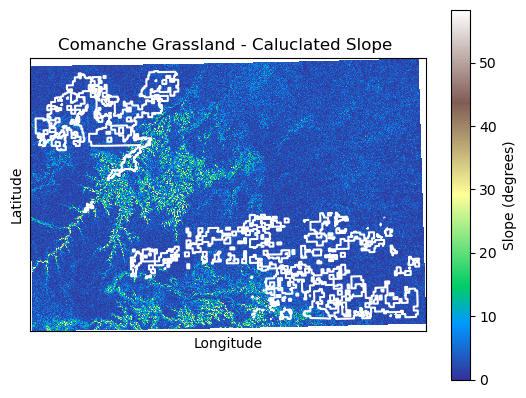

In [21]:
# Test to make sure the slope function worked by plotting
# Plot Comanche
slope_comanche.plot(
    cbar_kwargs={"label": "Slope (degrees)"},
    cmap='terrain',
)
# Overlay the boundary of the same study area
comanche_grassland_gdf.to_crs(utm13_epsg).boundary.plot(
    ax=plt.gca(),
    color='white').set(
        title='Comanche Grassland - Caluclated Slope ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()

## Comanche Caluculated Slope - plotted correctly, visually 
## there are some areas of degress slope 10-30 which 
## would potentially be areas that the Rocky Mountain Juiper is 
## commonly found 

They Rocky Mountain Juniper is commonly found in rocky canyons and 
ravines, there is an assumed slope, without finiding specifc degrees, 
would be around 30. While there doesn't visually appear to be many 
areas of slope at 30 degrees, there seems to be some areas between 
maybe 10 and 30 degrees within the grassland boundaries but due to 
the outline of  boundary, it's hard to see specifically where these 
areas might be. The habitat suitability mdoel should help with further 
conclusions.


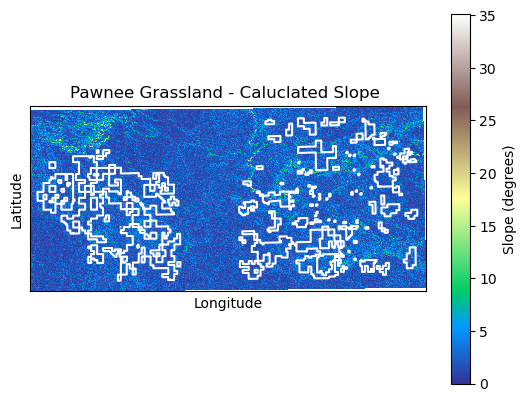

In [22]:
# Test to make sure the slope function worked by plotting
# Plot Pawnee
slope_pawnee.plot(
    cbar_kwargs={"label": "Slope (degrees)"},
    cmap='terrain',
)
# Overlay the boundary of the same study area
pawnee_grassland_gdf.to_crs(utm13_epsg).boundary.plot(
    ax=plt.gca(),
    color='white').set(
        title='Pawnee Grassland - Caluclated Slope ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()

## Pawnee Caluculated Slope - plotted correctly, visually 
## there are few areas of degress slope 10-30 which 
## would potentially be areas that the Rocky Mountain Juiper is 
## commonly found 

Compared to the Comanche Calculated Slope plot, this one appears 
to visually have fewer areas that have a slope between 10-30 degrees.
Of the areas that have a slope greater than 0 it seems to be between 
0 and 15 degrees, however it is difficult to draw conclusions visually 
when the resolution is so high. The habitat suitability model should 
help with further conclusions.


In [23]:
# Store variables needed in future notebooks

%store slope_da_list slope_comanche slope_pawnee

Stored 'slope_da_list' (list)
Stored 'slope_comanche' (DataArray)
Stored 'slope_pawnee' (DataArray)
